In [14]:
#24MAI0114 ABHAYNATH K
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
data=pd.read_csv(r"D:\VIT\AI ML\Dataset\Groceries_dataset.csv")
data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [16]:
#24MAI0114 ABHAYNATH K
data.info

<bound method DataFrame.info of        Member_number        Date        itemDescription
0               1808  21-07-2015         tropical fruit
1               2552  05-01-2015             whole milk
2               2300  19-09-2015              pip fruit
3               1187  12-12-2015       other vegetables
4               3037  01-02-2015             whole milk
...              ...         ...                    ...
38760           4471  08-10-2014          sliced cheese
38761           2022  23-02-2014                  candy
38762           1097  16-04-2014               cake bar
38763           1510  03-12-2014  fruit/vegetable juice
38764           1521  26-12-2014               cat food

[38765 rows x 3 columns]>

In [17]:
#24MAI0114 ABHAYNATH K
data.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


In [18]:
data.dtypes

Member_number       int64
Date               object
itemDescription    object
dtype: object

In [19]:
#24MAI0114 ABHAYNATH K
#king if there is any null values or not?
data.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [20]:
basket=pd.DataFrame(data)

In [21]:
#24MAI0114 ABHAYNATH K
#Typecasting
#converting the date object format to datetinme format
basket["Date"]=pd.to_datetime(basket["Date"])

C:\Users\Abhay\AppData\Local\Temp\ipykernel_29708\775268749.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  basket["Date"]=pd.to_datetime(basket["Date"])


In [22]:
basket.dtypes

Member_number               int64
Date               datetime64[ns]
itemDescription            object
dtype: object

Grouping Transactions

for Apriory algorithm the input is the group of item here group of purchase items
Here the individual items are listed. that we need to group purchase of a same person in the same date

In [23]:
#24MAI0114 ABHAYNATH K
basket.itemDescription=basket.itemDescription.transform(lambda x:[x])
basket=basket.groupby(["Member_number","Date"]).sum()["itemDescription"].reset_index(drop=True)

In [24]:
#24MAI0114 ABHAYNATH K
display(basket)

0                        [whole milk, pastry, salty snack]
1        [sausage, whole milk, semi-finished bread, yog...
2                               [soda, pickled vegetables]
3                           [canned beer, misc. beverages]
4                              [sausage, hygiene articles]
                               ...                        
14958                    [butter milk, whipped/sour cream]
14959                               [bottled water, herbs]
14960                      [fruit/vegetable juice, onions]
14961                     [bottled beer, other vegetables]
14962         [soda, root vegetables, semi-finished bread]
Name: itemDescription, Length: 14963, dtype: object

Apriory algorithm 

TransactionEncoder to encode the transactions into a format that is suitable for the Apriori function.

In [25]:
#24MAI0114 ABHAYNATH K
encoder= TransactionEncoder()
transactions=pd.DataFrame(encoder.fit(basket).transform(basket),columns=encoder.columns_)
display(transactions.head(10))


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False


Apriori and Association Rules


The Apriori Algorithm will be used to generate frequent item sets. We will be specifying the minimum support to be 6 out of total transactions. The association rules are generated and we filter for Lift value > 1.5.


In [26]:
#24MAI0114 ABHAYNATH K
frequent_items=apriori(transactions,min_support=6/len(basket),use_colnames=True,max_len=2)
rules=association_rules(frequent_items,metric='lift',min_threshold=1.5)
display(rules.head(10))
print("Rules identified: ", len(rules))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(UHT-milk),(butter milk),0.021386,0.017577,0.000601,0.028125,1.600131,0.000226,1.010854,0.383247
1,(butter milk),(UHT-milk),0.017577,0.021386,0.000601,0.034221,1.600131,0.000226,1.013289,0.381761
2,(UHT-milk),(cream cheese ),0.021386,0.023658,0.000869,0.040625,1.717152,0.000363,1.017685,0.426767
3,(cream cheese ),(UHT-milk),0.023658,0.021386,0.000869,0.036723,1.717152,0.000363,1.015922,0.427761
4,(artif. sweetener),(soda),0.001938,0.097106,0.000468,0.241379,2.485725,0.000280,1.190178,0.598864
5,(soda),(artif. sweetener),0.097106,0.001938,0.000468,0.004818,2.485725,0.000280,1.002893,0.661986
6,(whole milk),(artif. sweetener),0.157923,0.001938,0.000535,0.003386,1.746815,0.000229,1.001452,0.507708
7,(artif. sweetener),(whole milk),0.001938,0.157923,0.000535,0.275862,1.746815,0.000229,1.162868,0.428360
8,(canned beer),(baking powder),0.046916,0.008087,0.000601,0.012821,1.585399,0.000222,1.004795,0.387420
9,(baking powder),(canned beer),0.008087,0.046916,0.000601,0.074380,1.585399,0.000222,1.029671,0.372254


Rules identified:  190


Visualization

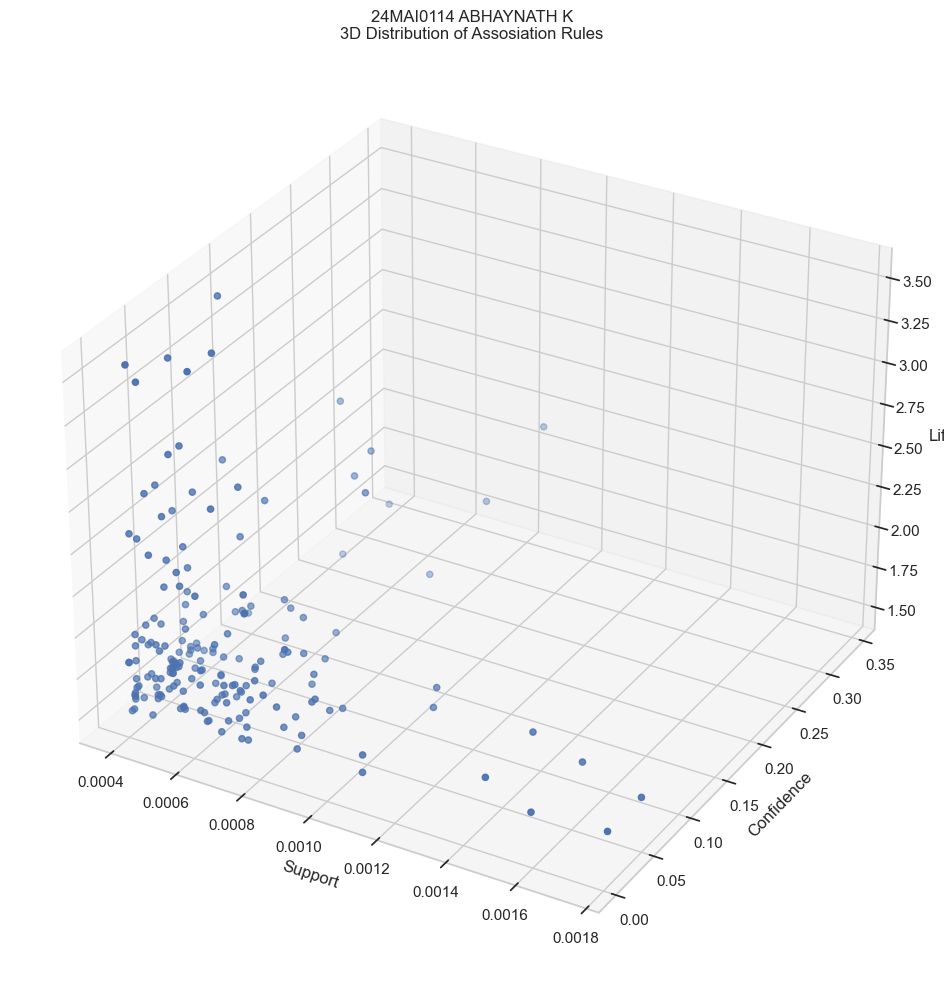

In [27]:
#24MAI0114 ABHAYNATH K
sns.set(style='whitegrid')
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(projection='3d')


x=rules['support']
y=rules['confidence']
z=rules['lift']

ax.set_xlabel("Support")
ax.set_ylabel("Confidence")
ax.set_zlabel("Lift")

ax.scatter(x,y,z)
ax.set_title("24MAI0114 ABHAYNATH K\n3D Distribution of Assosiation Rules")
plt.show()
